# Activation functions

## Sigmoid

act(x) = sigmoid(x) where sigmoid is the logistic function

output is between 0 and 1, so squashing function


Advantage - differntiable everywhere
Disadvantage - for large positive or negative values of x, sigmoid plateus, gradients die out, so neurons don't learn

## tanh

act(x) = tanh(x) = (e ** x - e ** (-x))/(e ** x + e ** -x)

output between -1 and 1, so squashing function

Advantage - differntiable everywhere
Disadvantage - for large positive or negative values of x, sigmoid plateus, gradients die out, so neurons don't learn

## RELU (Rectified Linear Unit)

Used by original transformer paper, T5

act(x) = max(x,0)

advantage - no diminishing gradients in the x>0 part, so neurons don't die during backprop unlike Tanh or sigmoid

disadvantage - kink (non-differentiable) at x=0, you could still have neurons die if x < 0

## GeLU (Gaussian Error Linear Unit)

Used by BERT, GPT architectures

act(x) = xP(X<=x)

where P(X<=x) is the guassian CDF

Smoother compared to ReLU - no kink at 0

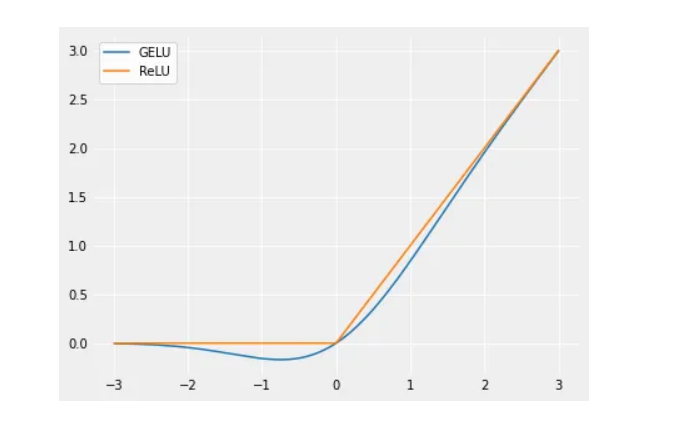

## SWISH

act(x) = x * sigma(beta * x), where sigma is the logistic function, beta is a trainable parameter

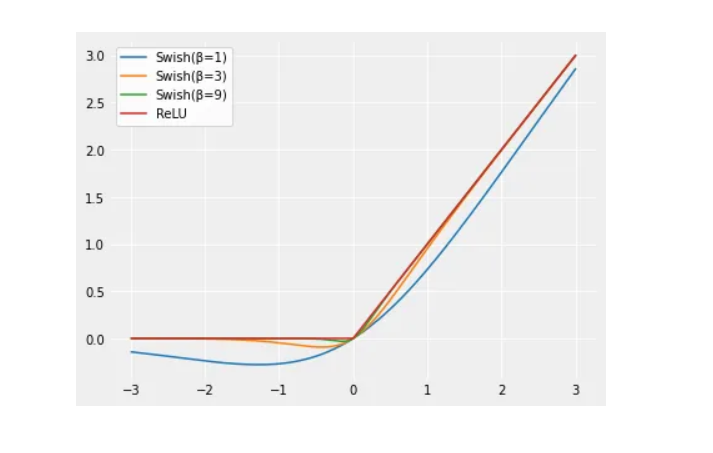


At larger beta values, Swish becomes like gelu

## GLU (Gated Linear Units)

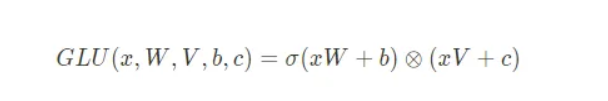

Has learnable parameters W,b, V,c

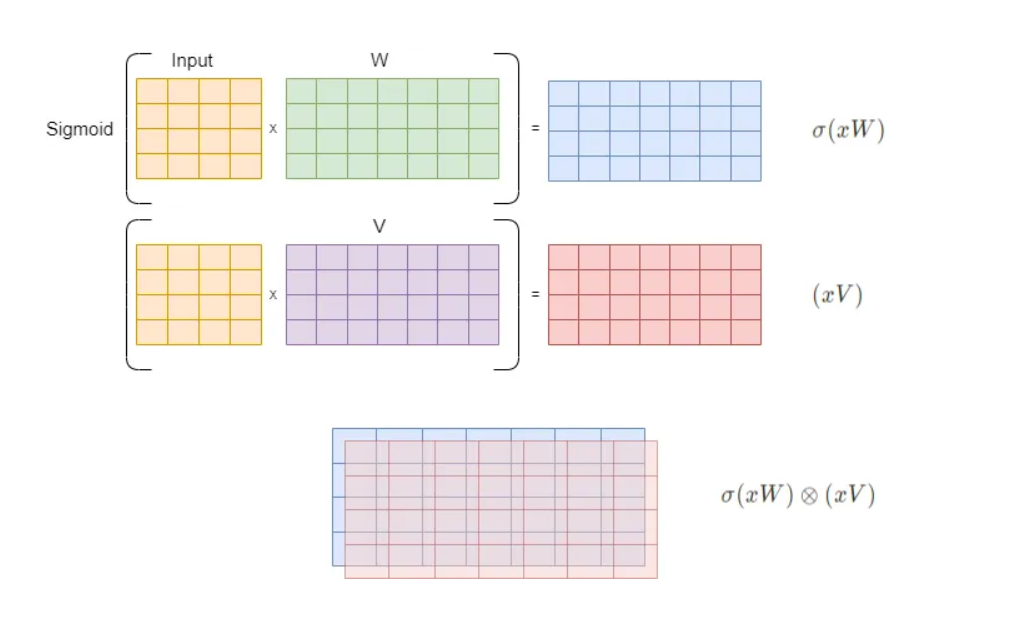

Output as a sigmoid acts as a filter of the XV + c component, diminishing or enhancing it

## ReGLU, GeGLU, SwiGLU

Combine GLU with  ReLU, GeLU and Swish respectively, to get ReGLU, GeGLU and SwiGLU

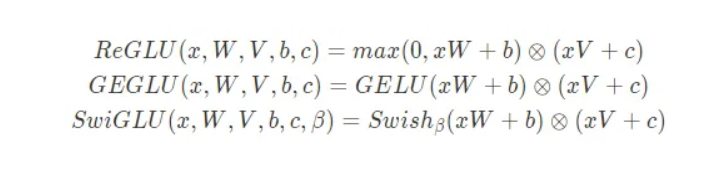




SWIGLU - Used by PALM, LLAMA

Resembles a combination of a linear function and a sigmoid function, with a kink at x=1.

looks like a piecewise function with three different parts. 
1) For input values less than zero, the function output is zero. 
3) For input values between zero and one, the function output is equal to the input value multiplied by a sigmoid function that has been "gated" by the input value
3) For input values greater than one, the function output is equal to the input value.

## Final form of FFN part of transformer

In transformer architectures, activation functions are applied in the FFN part (not the self-attention part)

Given X, we typically have for every token , W1x+b1, pass it through activation function, and then apply a linear layer to get

FFN(x, W1, W2, b1, b2) = max(0, xW1 + b1)W2 + b2 for ReLU

Typically, biases are dropped

This thus simplifies to 

FFNReLU(x, W1, W2) = max(xW1, 0)W2



Similarly

FFNGELU(x, W1, W2) = GELU(xW1)W2
FFNSwish(x, W1, W2) = Swish1(xW1)W2 - Swish has a parameter 

FFNGLU(x, W, V, W2) = (σ(xW) ⊗ xV )W2
FFNReGLU(x, W, V, W2) = (max(0, xW) ⊗ xV )W2
FFNGEGLU(x, W, V, W2) = (GELU(xW) ⊗ xV )W2
FFNSwiGLU(x, W, V, W2) = (Swish1(xW) ⊗ xV )W2

All of these layers have three weight matrices, as opposed to two for the original FFN. To keep thenumber of parameters and the amount of computation constant, we reduce the number of hidden units in dff (the second dimension of W and V and the first dimension of W2) by a factor of 2
3 when comparing these layers to the original two-matrix version


## Results

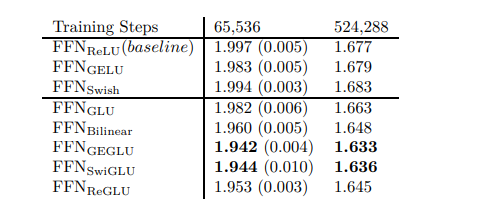

during pre-training

SwiGLU, etc work better in practice . Why ? "We offer no explanation as to why these
architectures seem to work; we attribute their success, as all else, to divine benevolence." - :) https://arxiv.org/pdf/2002.05202.pdf

## References

1) https://www.quora.com/What-does-the-SwiGLU-activation-function-look-like
2) https://medium.com/@tariqanwarph/activation-function-and-glu-variants-for-transformer-models-a4fcbe85323f
3) https://arxiv.org/pdf/2002.05202.pdf